In [253]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


# Let’s run the basic SIR model

In [254]:
# describe the model
def deriv(y, t, N, beta, k, delta, d):
    S, E, I, R, D = y
    P = 1 - (I/N)**(1/10)
    dSdt = -P * beta * S * I / N
    dEdt = P * beta * S * I / N - delta * E #k ist för delta?
    dIdt = delta * E - k * I
    dRdt = (1 - d) * k * I
    dDdt = I * d
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [255]:
# describe the parameters
N = 10000000                 #population #1351
delta = 1.0/5.0              #incubation time. (ratio? andel smittade per exposed?)
beta = 5                     #reproduction            
theta = 0.5 * R              #antivaccine
d = 0.03                     #mortality risk
k=1/7                        #infectious period
gamma = 1/d                  #konstant för recovered per dag.                
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0 # initial conditions: one infected, rest susceptible

In [256]:
t = np.linspace(0, 200, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, k, delta, d))
S, E, I, R, D = ret.T

In [257]:
def plotsir(t, S, E, I, R,): #D då?
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Death')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.savefig("Plot.png")
  plt.show();

plot the graph

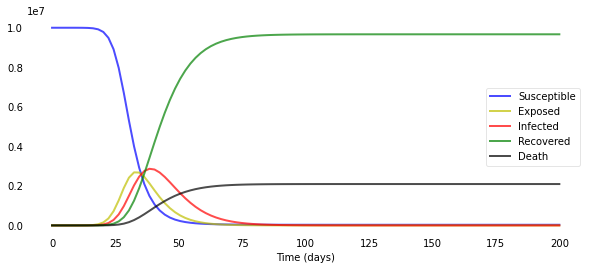

In [258]:
plotsir(t, S, E, I, R)